## Predict a price house (Boston, MA)

### Data description
The Boston data frame has 506 rows and 14 columns.
This data frame contains the following columns:

-crim: per capita crime rate by town.

-zn: proportion of residential land zoned for lots over 25,000 sq.ft.

-indus: proportion of non-retail business acres per town.

-chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

-nox: nitrogen oxides concentration (parts per 10 million).

-rm: average number of rooms per dwelling.

-age: proportion of owner-occupied units built prior to 1940.

-dis: weighted mean of distances to five Boston employment centres.

-rad index of accessibility to radial highways.

-tax: full-value property-tax rate per \$10,000.

-ptratio: pupil-teacher ratio by town.

-black: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

-lstat: lower status of the population (percent).

-medv: median value of owner-occupied homes in \$1000s.

In [1]:
# Import module

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load the dataset

boston_train = pd.read_csv("train.csv")
boston_test = pd.read_csv("test.csv")
sub = pd.read_csv("submission_example.csv")

In [3]:
# Checking head dataset
boston_train.head(5)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [4]:
# Checking missing values / There is no NaValues
boston_train.isnull().sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [5]:
# Analyzing describre numbers
boston_train.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [6]:
# the column "ID" can be excluded because don't have any sense in this dataset

del(boston_train['ID'])
del(boston_test['ID'])
del(sub['ID'])

In [7]:
# Exploratory analysis about prices Boston House's 

In [8]:
correl = boston_train.corr()
correlacao = correl[correl != 1]
correlacao

correlacaoneg = correl[correl != 1]
correlacaoneg

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,NaN,-0.210913,0.422228,-0.041195,0.463001,-0.310180,0.379034,-0.397067,0.666636,0.617081,0.313409,-0.475796,0.532077,-0.407454
zn,-0.210913,NaN,-0.518679,-0.024442,-0.501990,0.328197,-0.544513,0.637142,-0.303663,-0.311180,-0.380449,0.168130,-0.388112,0.344842
indus,0.422228,-0.518679,NaN,0.037496,0.750087,-0.440365,0.638378,-0.702327,0.569779,0.708313,0.391087,-0.335049,0.614155,-0.473932
chas,-0.041195,-0.024442,0.037496,NaN,0.080275,0.112251,0.068286,-0.081834,0.007714,-0.021826,-0.125067,0.062029,-0.050055,0.204390
nox,0.463001,-0.501990,0.750087,0.080275,NaN,-0.338515,0.736000,-0.769364,0.612180,0.670722,0.192513,-0.369416,0.598874,-0.413054
rm,-0.310180,0.328197,-0.440365,0.112251,-0.338515,NaN,-0.248573,0.269191,-0.272783,-0.356987,-0.366927,0.155202,-0.615747,0.689598
age,0.379034,-0.544513,0.638378,0.068286,0.736000,-0.248573,NaN,-0.764208,0.447380,0.511893,0.259293,-0.268054,0.588834,-0.358888
dis,-0.397067,0.637142,-0.702327,-0.081834,-0.769364,0.269191,-0.764208,NaN,-0.477610,-0.529539,-0.231101,0.284374,-0.505939,0.249422
rad,0.666636,-0.303663,0.569779,0.007714,0.612180,-0.272783,0.447380,-0.477610,NaN,0.903562,0.470849,-0.406405,0.484568,-0.352251
tax,0.617081,-0.311180,0.708313,-0.021826,0.670722,-0.356987,0.511893,-0.529539,0.903562,NaN,0.467437,-0.406477,0.544485,-0.448078


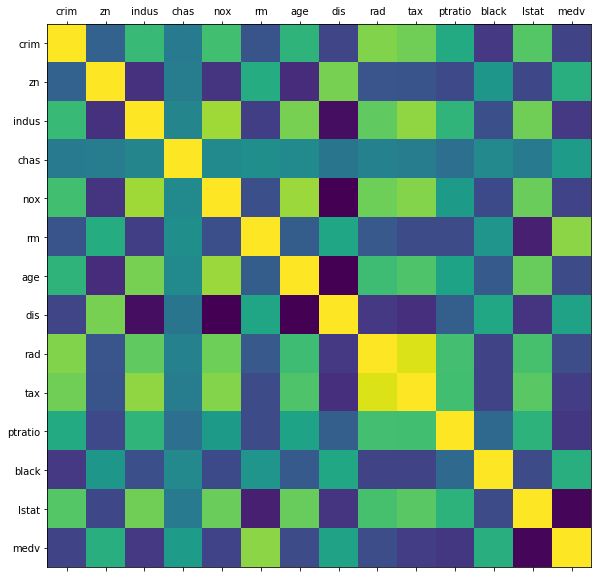

In [9]:
corr = boston_train.corr()
fig, ax = plt.subplots(figsize = (10,10))
ax.matshow(corr)  
plt.xticks(range(len(corr.columns)), corr.columns) 
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [10]:
correlacao.max()

crim       0.666636
zn         0.637142
indus      0.750087
chas       0.204390
nox        0.750087
rm         0.689598
age        0.736000
dis        0.637142
rad        0.903562
tax        0.903562
ptratio    0.470849
black      0.336660
lstat      0.614155
medv       0.689598
dtype: float64

In [11]:
correlacaoneg.min()

crim      -0.475796
zn        -0.544513
indus     -0.702327
chas      -0.125067
nox       -0.769364
rm        -0.615747
age       -0.764208
dis       -0.769364
rad       -0.477610
tax       -0.529539
ptratio   -0.481376
black     -0.475796
lstat     -0.738600
medv      -0.738600
dtype: float64

In [12]:
# Through the discussion board, you may have had access to larger series, whether better or worse.
# Apparently the variable "chas" does not seem to relate well as much, demonstrating uselessness in the dataset, however, later we will talk about it.

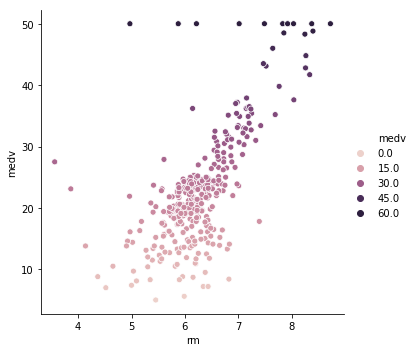

In [13]:
sns.relplot(x="rm", y="medv", hue="medv", data=boston_train)
# A variável numero de quartos, mostrou ser a variável diretamente mais importante na questão preço de casa

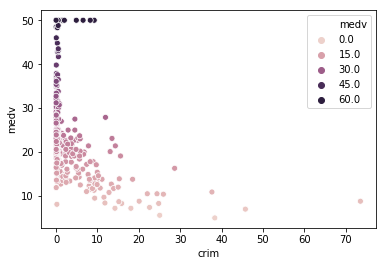

In [14]:
sns.scatterplot(x="crim", y="medv", hue="medv" ,data=boston_train)
# Safe places may have cheap houses, but in general, all the more expensive homes are located in safe locations.

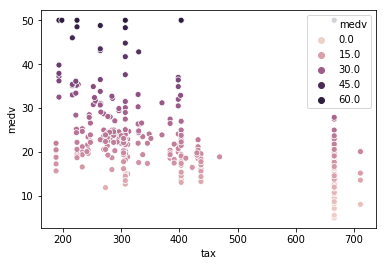

In [15]:
sns.scatterplot(x="tax", y="medv", hue="medv", data=boston_train)
# More expensive homes do not necessarily pay more taxes in Boston

In [16]:
# Divide the medv predictor variable into classes
bins_medv = [0, 15, 30,45, 60]
labels_medv = [0,1,2,3]
boston_train['medv'] = pd.cut(boston_train['medv'], bins_medv, labels = labels_medv, 
                              right=True, include_lowest=True)
boston_train['medv'] = pd.cut(boston_train['medv'], bins_medv, labels = labels_medv, 
                              right=True, include_lowest=True)

# Prediciting the Price Houses

In [18]:
# Training data
x_train = boston_train.drop(['medv'], axis=1)
y_train = boston_train['medv']

In [19]:
# Import the classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train.ravel())
rf_pred = rf.predict(boston_test)

C:\Users\Marcos Rocha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
